In [2]:
!pip install tashaphyne

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 251.5/251.5 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.4/126.4 kB 8.1 MB/s eta 0:00:00


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from nltk.tokenize import word_tokenize
from tashaphyne.stemming import ArabicLightStemmer
import nltk
nltk.download('punkt')
drive.mount('/content/drive')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Mounted at /content/drive


In [4]:
dataset=pd.read_csv('/content/drive/MyDrive/SeniorProject1/data/experiment/SP2_new_training_set.csv').drop(columns=['Unnamed: 0'])
dataset

,Tweet,Class
0,حرصا سلامة المدنين الرجاء الجميع إكسبو دبي رجا...,negative
1,عبدالله زايد وزير خارجية الإمارات يزور الجناح ...,negative
2,بدون مبالغة تنظيم أسبوع المهندس الجامعة أيام ز...,negative
3,جناح المغرب يفوز بجائزة افضل تصميم داخلي إكسبو...,negative
4,نسلط الضوء مرة رواق ممل فارغ إكسبو دبي رواق ال...,negative
...,...,...
7495,توقف اختارت فرقة دبي لاستءناف جولاتها العالم...,neutral
7496,اكسبو دبي يقترب اخبار الامارات اكسبو دبي را...,neutral
7497,مجموعة اصدارات جواز اكسبو,neutral
7498,محمد راشد اثناء حضوري تمرين حصن الاتحاد اكس...,neutral


In [5]:
dataset.isnull().sum()

,0
Tweet,9
Class,0


In [6]:
dataset.dropna(inplace=True)

In [7]:
def stem(text):
  stemmer=ArabicLightStemmer()
  tokens=word_tokenize(text)
  tokens
  stemmized=[]
  for t in tokens:
    stem=stemmer.light_stem(t)
    stemmized.append(stem)

  return ' '.join(stemmized)

In [8]:
text_stemmed=dataset['Tweet'].apply(lambda text: stem(text))

In [9]:
text_stemmed

,Tweet
0,حرص سلام مدن رجاء جميع إكسب دب رجاء بق مساف اف...
1,عبدالل زايد زير خارج إمار زور جناح سور إكسب دب...
2,دون مبالغ نظيم سبوع مهندس جامع يام زم حس نظيم ...
3,جناح مغرب فوز جائز فضل صميم داخل إكسب دب جناح ...
4,سلط ضوء مرة رواق ممل رغ إكسب دب رواق جزائر اضح...
...,...
7495,وقف اختار رق دب استءناف جول عالم ما سب علاق كس...
7496,كسبو دب قترب خبار امار كسبو دب رادار يوز مرا خبر
7497,مجموع اصدار جواز كسبو
7498,محمد راشد اثناء حضور مر حص اتحاد كسبو دب مر ظه...


In [10]:
X=text_stemmed.values
y=dataset['Class'].values

In [11]:
vectorizor=TfidfVectorizer()
labeler=LabelEncoder()

In [12]:
x_vector=vectorizor.fit_transform(X)
y_label=labeler.fit_transform(y)

In [13]:
print('vocab_size = ',x_vector.shape[1])

vocab_size =  9455


### Training

In [14]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV,StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay

In [15]:
#SVM
param_grid=[
    {'kernel':['rbf'],'gamma':[1e-1,1e-2,1e-3,1e-4],'C':[1,10,100,1000]},
    {'kernel':['linear'],'C':[1,10,100,1000]},
    {'kernel':['poly'],'gamma':[1e-1,1e-2,1e-3,1e-4],'C':[1,10,100,1000]}
]

svmClassifier=GridSearchCV(SVC(),param_grid,cv=StratifiedKFold(n_splits=5))

In [16]:
svmClassifier.fit(x_vector,y_label)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=SVC(),
             param_grid=[{'C': [1, 10, 100, 1000],
                          'gamma': [0.1, 0.01, 0.001, 0.0001],
                          'kernel': ['rbf']},
                         {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000],
                          'gamma': [0.1, 0.01, 0.001, 0.0001],
                          'kernel': ['poly']}])

In [17]:
print('The best parameter settings of the SVM is ',svmClassifier.best_params_)

The best parameter settings of the SVM is  {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}


In [18]:
#Random Forest
params={'n_estimators':[3, 8, 10, 30, 50],
        'max_depth': [4, 6, 8, 10],
        'min_samples_leaf': [4, 5, 6, 8],
        'min_samples_split' : [4, 5, 7, 8]}

RFClassifier=GridSearchCV(RandomForestClassifier(),params,cv=StratifiedKFold(n_splits=5))

In [19]:
RFClassifier.fit(x_vector,y_label)

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(),
             param_grid={'max_depth': [4, 6, 8, 10],
                         'min_samples_leaf': [4, 5, 6, 8],
                         'min_samples_split': [4, 5, 7, 8],
                         'n_estimators': [3, 8, 10, 30, 50]})

In [20]:
print('The best parameter settings of the Random Forest is ',RFClassifier.best_params_)

The best parameter settings of the Random Forest is  {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 8, 'n_estimators': 50}


In [21]:
# Naive Bayes
params={
    'alpha':[0,0.1,0.2,0.3,0.4,0.5,1,2] #alpha is the smoothing value of Laplace smoothing
    }

NBClassifier=GridSearchCV(MultinomialNB(),params,cv=StratifiedKFold(n_splits=5))

In [22]:
NBClassifier.fit(x_vector,y_label)

/usr/local/lib/python3.10/dist-packages/sklearn/naive_bayes.py:890: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = np.log(smoothed_fc) - np.log(
/usr/local/lib/python3.10/dist-packages/sklearn/naive_bayes.py:890: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = np.log(smoothed_fc) - np.log(
/usr/local/lib/python3.10/dist-packages/sklearn/naive_bayes.py:890: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = np.log(smoothed_fc) - np.log(
/usr/local/lib/python3.10/dist-packages/sklearn/naive_bayes.py:890: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = np.log(smoothed_fc) - np.log(
/usr/local/lib/python3.10/dist-packages/sklearn/naive_bayes.py:890: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = np.log(smoothed_fc) - np.log(


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=MultinomialNB(),
             param_grid={'alpha': [0, 0.1, 0.2, 0.3, 0.4, 0.5, 1, 2]})

In [23]:
print('The best parameter settings of the Naive Bayes is ',NBClassifier.best_params_)

The best parameter settings of the Naive Bayes is  {'alpha': 0.3}


### Evaluation

In [24]:
testing_set=pd.read_csv('/content/drive/MyDrive/SeniorProject1/data/experiment/SP2_new_testing_set.csv').drop(columns=['Unnamed: 0'])
testing_set

,ID,Tweet,Class
0,1459544625937587968,اكسبو دبي صارله اكتر شهر الله يعلم شو التخبيص ...,negative
1,1506252228184654080,اللي اكسبو يفكر يدخل الأجنحة الكبيرة مدة انتظا...,negative
2,1444035907632439040,حزين جدا اكسبو دبي خلص مانشوف فيديو لافتتاح ال...,negative
3,1499450000000000000,محد مهتم,negative
4,1501460000000000000,شوفي شنو قاعد يسوي مدير مكتبج معالي الوكيلة ور...,negative
...,...,...,...
745,1510660000000000000,المكتب الدولي لمعارض يعلن جواءزه المقدمة افضل ...,neutral
746,1499820000000000000,حفظ اله سوريا حاكم دبي يزور الجناح السوري اكسب...,neutral
747,1500470000000000000,احتفلنا باليوم الوطني لجمهورية كرواتيا اكسبو ...,neutral
748,1508370000000000000,احتفا الحدث الدولي اكسبو دبي بساعة الارض عبر...,neutral


In [30]:
X_test=testing_set['Tweet'].apply(lambda text: stem(text)).values
y_test=testing_set['Class'].values

x_test_vector=vectorizor.transform(X_test)
y_test_label=labeler.transform(y_test)

In [31]:

y_pred_svm=svmClassifier.predict(x_test_vector)
print(classification_report(y_test_label,y_pred_svm,target_names=['negative','neutral','positive']))

              precision    recall  f1-score   support

    negative       0.79      0.54      0.64       250
     neutral       0.61      0.75      0.67       250
    positive       0.67      0.74      0.70       250

    accuracy                           0.67       750
   macro avg       0.69      0.67      0.67       750
weighted avg       0.69      0.67      0.67       750



In [32]:
y_pred_rf=RFClassifier.predict(x_test_vector)
print(classification_report(y_test_label,y_pred_rf,target_names=['negative','neutral','positive']))

              precision    recall  f1-score   support

    negative       0.60      0.71      0.65       250
     neutral       0.56      0.66      0.61       250
    positive       0.73      0.47      0.57       250

    accuracy                           0.61       750
   macro avg       0.63      0.61      0.61       750
weighted avg       0.63      0.61      0.61       750



In [33]:
y_pred_nb=NBClassifier.predict(x_test_vector)
print(classification_report(y_test_label,y_pred_nb,target_names=['negative','neutral','positive']))

              precision    recall  f1-score   support

    negative       0.83      0.71      0.76       250
     neutral       0.67      0.74      0.70       250
    positive       0.69      0.72      0.71       250

    accuracy                           0.72       750
   macro avg       0.73      0.72      0.72       750
weighted avg       0.73      0.72      0.72       750



###### Balancing the testing dataset

In [29]:
from sklearn.utils import resample

In [ ]:
pos_samples=testing_set[testing_set['Class']=='positive']
neg_samples=testing_set[testing_set['Class']=='negative']
neu_samples=testing_set[testing_set['Class']=='neutral']

In [ ]:
pos_resampled=resample(pos_samples, n_samples=len(neg_samples), random_state=0)
neu_resampled=resample(neu_samples, n_samples=len(neg_samples), random_state=0)

In [ ]:
print(len(pos_resampled),len(neg_samples),len(neu_resampled))

55 55 55


In [ ]:
pos_resampled['Class']='positive'
neg_samples['Class']='negative'
neu_resampled['Class']='neutral'

<ipython-input-42-1bf218f0adb5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  neg_samples['Class']='negative'


In [ ]:
test_balanced=pd.concat([pos_resampled,neg_samples,neu_resampled])

In [ ]:
X_test_balanced=test_balanced['Tweet'].apply(lambda text: stem(text)).values
y_test_balanced=test_balanced['Class'].values

x_test_vector=vectorizor.transform(X_test_balanced)
y_test_label=labeler.transform(y_test_balanced)

              precision    recall  f1-score   support

    negative       0.81      0.76      0.79        55
     neutral       0.73      0.75      0.74        55
    positive       0.75      0.78      0.77        55

    accuracy                           0.76       165
   macro avg       0.76      0.76      0.76       165
weighted avg       0.76      0.76      0.76       165



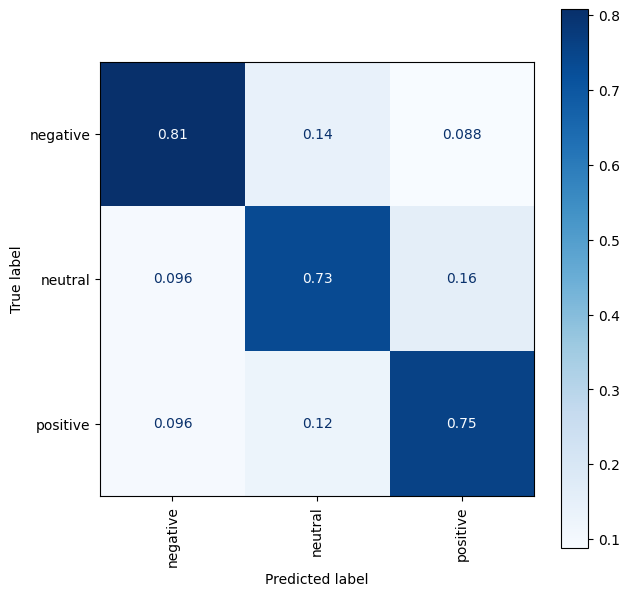

In [ ]:
#with balancing the testing set
y_pred_svm=svmClassifier.predict(x_test_vector)
print(classification_report(y_test_label,y_pred_svm,target_names=['negative','neutral','positive']))
#display the confusion matrix
fig,ax=plt.subplots(figsize=(7, 7))
ConfusionMatrixDisplay.from_predictions(y_test_label,y_pred_svm,display_labels=['negative','neutral','positive'],normalize='pred',cmap=plt.cm.Blues, xticks_rotation='vertical',ax=ax)
plt.show()

              precision    recall  f1-score   support

    negative       0.63      0.87      0.73        55
     neutral       0.74      0.45      0.56        55
    positive       0.64      0.64      0.64        55

    accuracy                           0.65       165
   macro avg       0.67      0.65      0.64       165
weighted avg       0.67      0.65      0.64       165



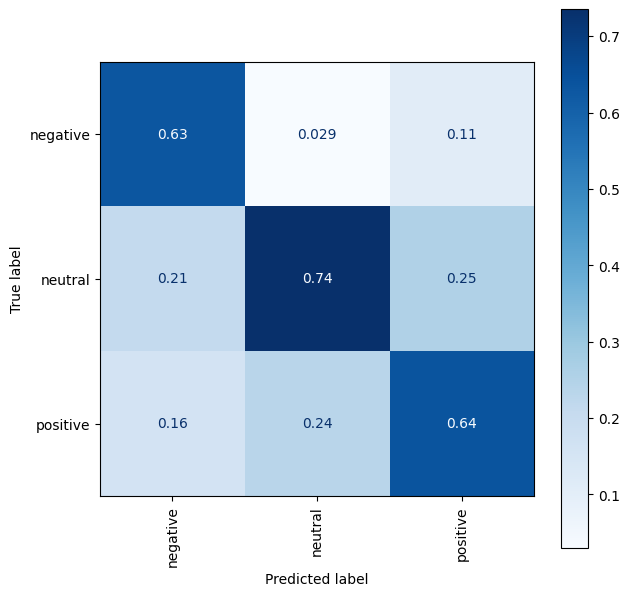

In [ ]:
y_pred_rf=RFClassifier.predict(x_test_vector)
print(classification_report(y_test_label,y_pred_rf,target_names=['negative','neutral','positive']))
#display the confusion matrix
fig,ax=plt.subplots(figsize=(7, 7))
ConfusionMatrixDisplay.from_predictions(y_test_label,y_pred_rf,display_labels=['negative','neutral','positive'],normalize='pred',cmap=plt.cm.Blues, xticks_rotation='vertical',ax=ax)
plt.show()

              precision    recall  f1-score   support

    negative       0.86      0.80      0.83        55
     neutral       0.81      0.71      0.76        55
    positive       0.71      0.85      0.78        55

    accuracy                           0.79       165
   macro avg       0.80      0.79      0.79       165
weighted avg       0.80      0.79      0.79       165



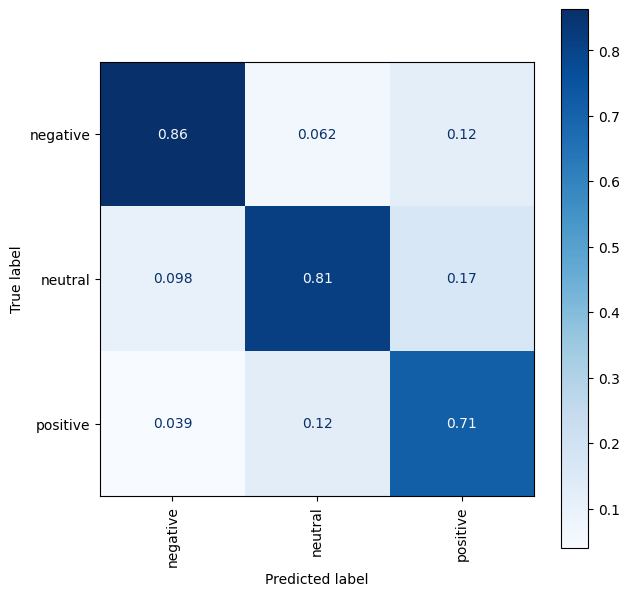

In [ ]:
y_pred_nb=NBClassifier.predict(x_test_vector)
print(classification_report(y_test_label,y_pred_nb,target_names=['negative','neutral','positive']))
#display the confusion matrix
fig,ax=plt.subplots(figsize=(7, 7))
ConfusionMatrixDisplay.from_predictions(y_test_label,y_pred_nb,display_labels=['negative','neutral','positive'],normalize='pred',cmap=plt.cm.Blues, xticks_rotation='vertical',ax=ax)
plt.show()

In [ ]:
test_balanced.to_csv('/content/drive/MyDrive/SeniorProject1/data/experiment/balanced_testing_set.csv')

In [34]:
#save the models
import pickle

with open("/content/drive/MyDrive/SeniorProject1/models/svm-tfidf.pkl", "wb") as f:
    pickle.dump(svmClassifier, f)

with open("/content/drive/MyDrive/SeniorProject1/models/randomforest-tfidf.pkl", "wb") as f:
    pickle.dump(RFClassifier, f)


with open("/content/drive/MyDrive/SeniorProject1/models/naivebayes-tfidf.pkl", "wb") as f:
    pickle.dump(NBClassifier, f)

with open("/content/drive/MyDrive/SeniorProject1/models/tfidf-vectorizer.pkl", "wb") as f:
    pickle.dump(vectorizor, f)